# Import initial utilities


In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Import GADGET DS


In [16]:
data_dict = np.load('OUTFILE2.npz')
test_flags  = data_dict['test_flags']
test_hosts  = data_dict['test_hosts']
test_mass   = data_dict['test_mass']
test_labels = data_dict['test_labels']
test_input  = data_dict['test_input']
#test_snid   = dict_data['test_snid']
#test_labels = dict_data['test_labels']
print(test_mass)
print(np.sum(test_labels))

[ 1.29e+13  1.18e+13 -1.00e+00 ...  1.68e+12 -1.00e+00 -1.00e+00]
14396


# Data preprocessing

In [17]:
dr1 = pd.DataFrame(test_input[0], columns = ['dr1'])
dr2 = pd.DataFrame(test_input[1], columns = ['dr2'])
dr3 = pd.DataFrame(test_input[2], columns = ['dr3'])
dr4 = pd.DataFrame(test_input[3], columns = ['dr4'])
dr5 = pd.DataFrame(test_input[4], columns = ['dr5'])
dr6 = pd.DataFrame(test_input[5], columns = ['dr6'])
dr7 = pd.DataFrame(test_input[6], columns = ['dr7'])
dr8 = pd.DataFrame(test_input[7], columns = ['dr8'])
dr9 = pd.DataFrame(test_input[8], columns = ['dr9'])
dr10 = pd.DataFrame(test_input[9], columns = ['dr10'])
#mass = pd.DataFrame(test_mass, columns = ['Halo_Mass'])
lbl = pd.DataFrame(test_labels, columns =['labels'])


# Select all features and create dataframe

In [18]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
df = pd.concat([dr1, dr2, dr3, dr4, dr5, dr6, dr7, dr8, dr9, dr10, lbl], axis=1, ignore_index=False, sort=False)
df.describe()
#df_copy = pd.concat([dr1, dr2, dr3, dr4, dr5, dr6, dr7, dr8, dr9, dr10], axis = 1, ignore_index=False, sort=False)
#df_feat = pd.concat([dr1,lbl], axis = 1, ignore_index=False, sort=False)
#df_feat
#df_feat = pd.DataFrame(dr1)
#df_feat

,dr1,dr2,dr3,dr4,dr5,dr6,dr7,dr8,dr9,dr10,labels
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.041590,0.035498,0.031715,0.028671,0.022669,0.018245,0.014150,0.010592,0.007637,0.005590,0.287920
std,0.228701,0.189805,0.172076,0.159918,0.138253,0.122087,0.106314,0.091352,0.076190,0.062563,0.452798
min,-0.549880,-0.496523,-0.481050,-0.461699,-0.406847,-0.357301,-0.288844,-0.225038,-0.192885,-0.166285,0.000000
25%,-0.120314,-0.099419,-0.090975,-0.085624,-0.077953,-0.070932,-0.062756,-0.054854,-0.046126,-0.038499,0.000000
50%,0.012666,0.017028,0.017080,0.016611,0.014514,0.012530,0.009183,0.006920,0.004370,0.003465,0.000000
75%,0.172776,0.150776,0.138733,0.129822,0.111687,0.098234,0.084784,0.072062,0.060554,0.049400,1.000000
max,1.799557,1.439231,1.224202,1.049096,0.767859,0.593965,0.448477,0.353353,0.273357,0.199826,1.000000


# Concatenate and shuffle dataset, then select the training and testing set

In [19]:
df_0 = df.sort_values('labels').head(35604).sample(14300)
df_1 = df.sort_values('labels').tail(14396).sample(14300) 
df_1.labels.sum()
df_r = pd.concat([df_0, df_1])
#df_scaled = scaler.fit_transform(df_r.drop(['labels'], axis = 1))  
#df_copy1 = pd.DataFrame(df_scaled, columns=['dr1', 'dr2', 'dr3', 'dr4', 'dr5', 'dr6', 'dr7', 'dr8', 'dr9', 'dr10'])

shuffle_df = df_r.sample(frac = 1.0)
#shuffle_df.insert(10, "Model", ['LC','SF']*14300, True)
shuffle_df

,dr1,dr2,dr3,dr4,dr5,dr6,dr7,dr8,dr9,dr10,labels
34074,-0.296827,-0.293027,-0.293659,-0.293776,-0.284122,-0.253780,-0.216332,-0.171792,-0.112615,-0.070267,0
1195,-0.002840,0.023308,0.041858,0.053941,0.073820,0.090150,0.098246,0.092754,0.071367,0.048727,1
1130,0.185062,0.104796,0.079083,0.053433,0.038289,0.042304,0.072347,0.095768,0.109488,0.102086,1
35211,0.051339,0.027975,0.032919,0.032912,0.061765,0.076235,0.049770,0.013700,-0.001116,0.010323,1
14062,0.070021,0.111598,0.118403,0.135553,0.150522,0.131367,0.081530,0.051257,0.064010,0.077196,0
32943,0.345768,0.360787,0.341073,0.326220,0.279291,0.222125,0.156973,0.083122,0.039949,0.024799,1
5123,-0.082378,-0.028608,-0.009210,0.007127,0.008624,0.015315,0.035512,0.040876,0.003077,-0.035798,1
27562,0.049427,0.088879,0.113216,0.117457,0.115075,0.075886,0.040163,0.003354,-0.044922,-0.048986,0
48196,-0.000419,0.006415,0.000386,-0.006069,-0.029089,-0.054920,-0.073064,-0.067979,-0.071576,-0.063451,0
1407,0.151098,0.204294,0.240132,0.247416,0.231494,0.173594,0.120692,0.084616,0.058433,0.027969,1


In [20]:
# Define a size for your train set 
train_size = int(0.8 * len(df_r))

# Split your dataset 
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

train_set

,dr1,dr2,dr3,dr4,dr5,dr6,dr7,dr8,dr9,dr10,labels
34074,-0.296827,-0.293027,-0.293659,-0.293776,-0.284122,-0.253780,-0.216332,-0.171792,-0.112615,-0.070267,0
1195,-0.002840,0.023308,0.041858,0.053941,0.073820,0.090150,0.098246,0.092754,0.071367,0.048727,1
1130,0.185062,0.104796,0.079083,0.053433,0.038289,0.042304,0.072347,0.095768,0.109488,0.102086,1
35211,0.051339,0.027975,0.032919,0.032912,0.061765,0.076235,0.049770,0.013700,-0.001116,0.010323,1
14062,0.070021,0.111598,0.118403,0.135553,0.150522,0.131367,0.081530,0.051257,0.064010,0.077196,0
32943,0.345768,0.360787,0.341073,0.326220,0.279291,0.222125,0.156973,0.083122,0.039949,0.024799,1
5123,-0.082378,-0.028608,-0.009210,0.007127,0.008624,0.015315,0.035512,0.040876,0.003077,-0.035798,1
27562,0.049427,0.088879,0.113216,0.117457,0.115075,0.075886,0.040163,0.003354,-0.044922,-0.048986,0
48196,-0.000419,0.006415,0.000386,-0.006069,-0.029089,-0.054920,-0.073064,-0.067979,-0.071576,-0.063451,0
1407,0.151098,0.204294,0.240132,0.247416,0.231494,0.173594,0.120692,0.084616,0.058433,0.027969,1


In [21]:
#### THIS CELL IS FOR CALCULATE THE CONFUSION MATRIX ####


#### IMPORTANT NOTE: In a future patch we should be able to create
#### the plot_confusion_matrix.py script to just import from the 
#### cells, I'm not quite sure how that would work

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
    


np.set_printoptions(precision=2)

# Select data, X for attributes, y for labels

In [22]:
X = shuffle_df.drop(['labels'], axis = 1)
ylabels = shuffle_df.labels
#ymodel = shuffle_df.Model
#ymodel = copy1.Model
X_train = train_set.drop(['labels'], axis = 1)
X_test = test_set.drop(['labels'], axis= 1)
y_trainl = train_set.labels
y_testl = test_set.labels
#y_trainM = train_set.Model
#y_testM = test_set.Model

In [23]:
X_train.shape

(22880, 10)

# Import utilities from scikitlearn, models, evaluation metrics, Random Forest classifier is the model and the evaluation metric is accuracy score

In [24]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier


# Random Forest with sklearn

In [25]:
rf=RandomForestClassifier(n_estimators=2000, max_depth=8, n_jobs=-1,
                          criterion = 'entropy', class_weight='balanced')

## n_jobs = -1 tells my computer to use all its cores, I have only 2, so it runs on 2 cores
#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_trainl)

ypred = rf.predict(X_test)
#####

print('Traning and Testing on raw data, all features \n');
#### Model accuracy
print("Accuracy:", metrics.accuracy_score(y_testl, ypred))

for i, score_forest in enumerate(cross_val_score(rf, X, ylabels, cv = 3)):
    print('Random Forest accuracy for the %d score: %0.2f' % (i, score_forest))
score_forest=cross_val_score(rf, X, ylabels, cv=3)
#score_tree
cv_scores = []
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (score_forest.mean(), score_forest.std() * 2 ))
cv_score = score_forest.mean()
cv_scores.append(cv_score)

### We perform a cross validation score to see how accurate our decision tree is by 
### splitting the dataset into 10 folds for training and testing

Traning and Testing on raw data, all features 

('Accuracy:', 0.7811188811188812)
Random Forest accuracy for the 0 score: 0.78
Random Forest accuracy for the 1 score: 0.79
Random Forest accuracy for the 2 score: 0.78
Random Forest Accuracy: 0.78 (+/- 0.00)


Normalized confusion matrix
[[0.74 0.26]
 [0.18 0.82]]


<Figure size 432x288 with 0 Axes>

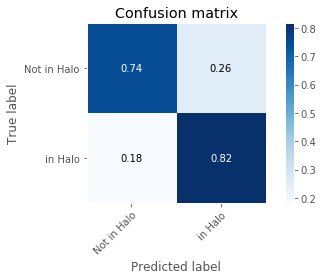

In [26]:
class_names=['Not in Halo','in Halo']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(y_testl, ypred, classes=class_names, normalize = True,
                      title='Confusion matrix')
plt.grid(False)
plt.show()

# ROC curve

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.867


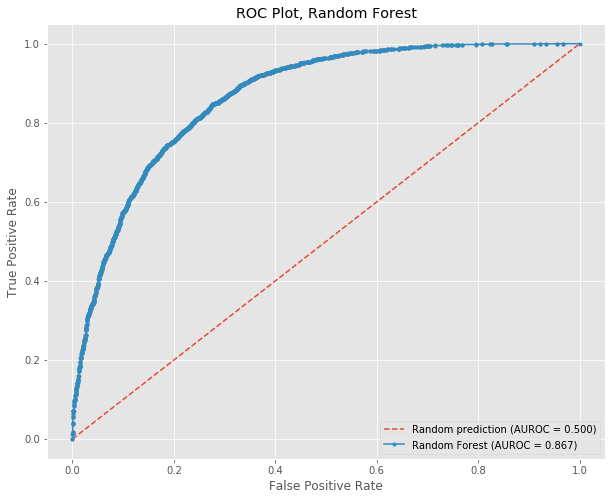

In [28]:
r_probs = [0 for _ in range(len(y_testl))]
rf_probs = rf.predict_proba(X_test)
rf_probs = rf_probs[:, 1]

from sklearn.metrics import roc_auc_score, roc_curve, auc
plt.style.use('ggplot')
plt.figure(figsize=(10,8))

r_auc = roc_auc_score(y_testl, r_probs)
rf_auc = roc_auc_score(y_testl, rf_probs)

print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))

r_fpr, r_tpr, _ = roc_curve(y_testl, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_testl, rf_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.title('ROC Plot, Random Forest')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc=4) # 
# Show plot
plt.grid(True)
plt.savefig('/home/jazhiel/Escritorio/Maestria/Machine_Learning/IMG_Tesis/ROC_RF.png')
plt.show()

$\delta_{r1}$     0.014383
$\delta_{r2}$     0.021699
$\delta_{r3}$     0.048903
$\delta_{r4}$     0.087367
$\delta_{r5}$     0.194922
$\delta_{r6}$     0.269841
$\delta_{r7}$     0.186576
$\delta_{r8}$     0.102873
$\delta_{r9}$     0.043573
$\delta_{r10}$    0.029864
dtype: float64


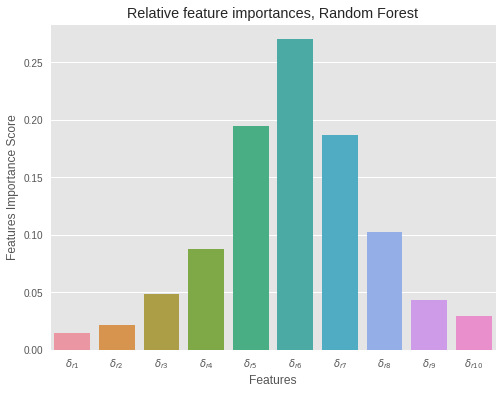

In [41]:
features = ['$\delta_{r1}$', '$\delta_{r2}$', '$\delta_{r3}$', '$\delta_{r4}$', '$\delta_{r5}$', '$\delta_{r6}$', '$\delta_{r7}$', '$\delta_{r8}$', '$\delta_{r9}$', '$\delta_{r10}$']
feature_imp = pd.Series(rf.feature_importances_,index=features)
print(feature_imp)
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
# Creating a bar plot
sns.barplot(x=feature_imp.index, y=feature_imp)
# Add labels to your graph
plt.xlabel('Features')
plt.ylabel('Features Importance Score')
plt.title("Relative feature importances, Random Forest")
plt.legend()
plt.savefig('/home/jazhiel/Escritorio/Maestria/Machine_Learning/IMG_Tesis/features_RF.png')
plt.show()

# Learning curve

In [34]:
from sklearn.model_selection import learning_curve
import time
start_time = time.time()
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(rf, 
                                                        X, 
                                                        ylabels,
                                                        # Number of folds in cross-validation
                                                        cv=3,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
print('---elapsed time = %s seconds ---' % (time.time()- start_time))

---elapsed time = 10703.980176 seconds ---


In [35]:
X.shape

(28600, 10)

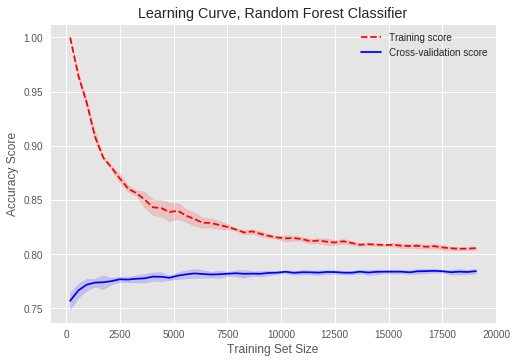

In [40]:
#Create means and standard deviations for train set scores
plt.style.use('ggplot')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color='r',  label="Training score")
plt.plot(train_sizes, test_mean, color='b', label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes,
                 train_mean - train_std,
                 train_mean + train_std,
                 color="r", alpha =0.15)

plt.fill_between(train_sizes,
                 test_mean - test_std,
                 test_mean + test_std,
                 color="b", alpha = 0.15)

# Create plot

#plt.tight_layout()
plt.title("Learning Curve, Random Forest Classifier") # All Features, ENZO dataset")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.grid(True)
plt.savefig('/home/jazhiel/Escritorio/Maestria/Machine_Learning/IMG_Tesis/Learning_RF.png')
plt.show()

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=8, class_weight='balanced')
dt = dt.fit(X_train, y_trainl)
#Predict the response for test dataset
ypredl = dt.predict(X_test)
#Model accuracy, how often is the classifier correct
#print(cross_val_score(dt1, X1.reshape(-1,1), y, cv=6))
print('Training and testing, raw data, all features \n')
print("Accuracy:", metrics.accuracy_score(y_testl, ypredl))
for i, score_tree in enumerate(cross_val_score(dt, X, ylabels, cv = 10)):
    print('Decision tree accuracy for the %d score: %0.2f' % (i, score_tree))
score_tree=cross_val_score(dt, X ,ylabels, cv=10)
#score_tree
cv_scores = []
print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (score_tree.mean(), score_tree.std() * 2 ))
cv_score = score_tree.mean()
cv_scores.append(cv_score)

Training and testing, raw data, all features 

('Accuracy:', 0.769055944055944)
Decision tree accuracy for the 0 score: 0.79
Decision tree accuracy for the 1 score: 0.78
Decision tree accuracy for the 2 score: 0.76
Decision tree accuracy for the 3 score: 0.77
Decision tree accuracy for the 4 score: 0.77
Decision tree accuracy for the 5 score: 0.79
Decision tree accuracy for the 6 score: 0.77
Decision tree accuracy for the 7 score: 0.77
Decision tree accuracy for the 8 score: 0.77
Decision tree accuracy for the 9 score: 0.77
Decision Tree Accuracy: 0.77 (+/- 0.02)


Random (chance) Prediction: AUROC = 0.500
Decision Tree: AUROC = 0.847


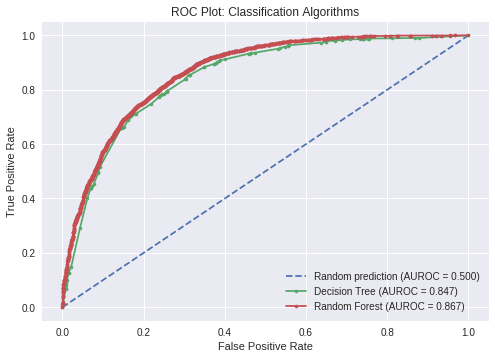

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
plt.style.use('seaborn')


r_probs = [0 for _ in range(len(y_testl))]
dt_probs = dt.predict_proba(X_test)
dt_probs = dt_probs[:, 1]

r_auc = roc_auc_score(y_testl, r_probs)
dt_auc = roc_auc_score(y_testl, dt_probs)

print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Decision Tree: AUROC = %.3f' % (dt_auc))

r_fpr, r_tpr, _ = roc_curve(y_testl, r_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_testl, dt_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.title('ROC Plot: Classification Algorithms')

#r_fpr, r_tpr, _ = roc_curve(y_testl, r_probs)
#rf_fpr, rf_tpr, _ = roc_curve(y_testl, rf_probs)
#plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
#plt.title('ROC Plot, $\delta r$')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc=4) # 
# Show plot
#plt.savefig('/home/jazhiel/Escritorio/Maestria/Machine_Learning/IMG_Tesis/ROC_DT.jpg')
plt.show()
